# Problem Statement
* ## To develop Machine Learning system(s) to predict the star rating of a review based on its meta features (e.g. reviewer ID, business ID etc.) and/or review text. 
* ## To implement and compare different machine learning models and explore the effective features for this sentiment prediction task.
### ---

# Data Acknowledgements
* ## The data has kindly been provided to us, under the provision that any resulting work should cite these two resources:
     * What Yelp fake review filter might be doing? A. Mukherjee, V. Venkataraman, B. Liu, and N. S. Glance, ICWSM, 2013.
     * Collective Opinion Spam Detection: Bridging Review Networks and Metadata. Shebuti Rayana, Leman Akoglu, ACM SIGKDD, Sydney, Australia, August 10-13, 2015
### ---

# The Data

1. Meta features: date, unique review ID, reviewer ID, business ID, votes cast by Yelp users (whether they think the review is funny, cool or useful)
2. The original review text, provided as a single file with rows corresponding to the meta file
3. Text features: produced by various text encoding methods for review text
4. Class label: rating (3 possible levels, 1, 3 or 5)(Target)
### ---

# Importing Relevant Libraries

### The libraries imported here are basic libraries that we would need to get started of with the Analysis and Modelling. All other relevant libraries will be imported as and when their functionality(ies) is/are required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, feature_extraction, model_selection, linear_model
import seaborn as sns
sns.set()

# Loading the Data

### The files loaded are:
* #### review_meta_train.csv (rating label in this file)
* #### review_text_train.csv: original review text.
* #### review_meta_test.csv
* #### review_text_test.csv: original review text.

In [2]:
review_text_train = pd.read_csv('../input/review_text_train.csv', index_col = False, delimiter = ',', header=0)
review_text_test = pd.read_csv('../input/review_text_test.csv', index_col = False, delimiter = ',', header=0)
review_meta_train = pd.read_csv('../input/review_meta_train.csv', index_col = False, delimiter = ',', header=0)
review_meta_test = pd.read_csv('../input/review_meta_test.csv', index_col = False, delimiter = ',', header=0)

### Examining Shapes of all Datasets
##### Here we examine the number of rows and columns that we'll be dealing with

In [3]:
print('review_text_train :\t', str(review_text_train.shape))
print('review_text_test :\t', str(review_text_test.shape))
print('review_meta_train :\t', str(review_meta_train.shape))
print('review_meta_test :\t', str(review_meta_test.shape))

review_text_train :	 (28068, 1)
review_text_test :	 (7018, 1)
review_meta_train :	 (28068, 8)
review_meta_test :	 (7018, 7)


In [4]:
review_meta_train

,date,review_id,reviewer_id,business_id,vote_funny,vote_cool,vote_useful,rating
0,3/15/2012,-s77HISu8DVQ8F0HxmWW6A,mthr7h15a_z9m9jRI6mG6Q,m5_GCJP2W4zEJnyVgxa3eA,0,1,3,1
1,6/21/2010,A2aCzGCgg6gAbatHiCrPfA,rhM01fl3iU0xHr3TIpCMhQ,m5_GCJP2W4zEJnyVgxa3eA,0,0,0,5
2,7/29/2011,DK2pd,SNHKDgmGiLn5chUlhdLCkg,CwPi6NVuJIZZx4IBcTekFQ,1,0,1,5
3,3/10/2006,b3BkUiWJEKNQko,HXjk1RVfLMPeZxitnk1Auw,43rd1LKcZRIunySzbMsyLQ,17,3,3,3
4,8/28/2012,RabHhte,W0ny0BqO0OJ4K4aVnSIlBw,CwPi6NVuJIZZx4IBcTekFQ,0,0,0,3
...,...,...,...,...,...,...,...,...
28063,5/8/2008,AoNuz5VBHjul-xWpp7Nbbg,JU96tV1CNyw5G03Yv79PRA,CwPi6NVuJIZZx4IBcTekFQ,0,0,0,1
28064,8/12/2012,F4b9FwPxyMRQO86eFiyYEA,IpVFQuWk4gEgQQ_XmzjeQQ,_n3OmwreEGPQmiHKklsD8w,0,0,0,1
28065,3/11/2010,D6Vel2u0lHi7QJK-jx,-vywj5I_Bh1FOzTe_sbQUw,43rd1LKcZRIunySzbMsyLQ,0,0,5,5
28066,3/9/2011,JSZrJ1yvndgXSKazIBkAOg,sjR61dvvQODav54vBNk0cg,dKcO9OQ44RPRlkWe-vToFA,0,0,0,5


In [5]:
review_text_train

,review
0,dear longman & eagle.......you've left me no c...
1,Delish. The hubby and I wanted to do brunch on...
2,"yep, I've giving Yolk 5 stars. It's just reall..."
3,"Meat, meat, meat. It's meat-tastic. So much me..."
4,I caught up with the law school girls on a Sat...
...,...
28063,This afternoon I went to Yolk with my college ...
28064,Place has lots of side dishes. But that's abou...
28065,I am a huge fan of Brazillian steakhouses I've...
28066,Great Brunch.\n


## Cleaning the Data

### Steps to Clean the Data :
1. ### Check whether there are any missing(or NaN) values int the data, if yes, remove them or use an appropriate front filling/back filling method
2. ### Drop Unnecessary Columns from the dataset
3. ### Join the Train Meta Dataset and the Train Reviews dataset and perform the same operations for the Test datast.

In [6]:
print('review_text_train :\n', str(review_text_train.isna().sum()), "\n**********\n")
print('review_text_test :\n', str(review_text_test.isna().sum()), "\n**********\n")
print('review_meta_train :\n', str(review_meta_train.isna().sum()), "\n**********\n")
print('review_meta_test :\n', str(review_meta_test.isna().sum()), "\n**********\n")

review_text_train :
 review    0
dtype: int64 
**********

review_text_test :
 review    0
dtype: int64 
**********

review_meta_train :
 date           0
review_id      0
reviewer_id    0
business_id    0
vote_funny     0
vote_cool      0
vote_useful    0
rating         0
dtype: int64 
**********

review_meta_test :
 date           0
review_id      0
reviewer_id    0
business_id    0
vote_funny     0
vote_cool      0
vote_useful    0
dtype: int64 
**********



# Creating Train and Test DataFrames

### Train DF

In [7]:
# Train DataFrame
df_train = review_text_train.copy()

In [8]:
df_train['vote_funny'] = review_meta_train.vote_funny
df_train['vote_cool'] = review_meta_train.vote_cool
df_train['vote_useful'] = review_meta_train.vote_useful
df_train['rating'] = review_meta_train.rating
df_train

,review,vote_funny,vote_cool,vote_useful,rating
0,dear longman & eagle.......you've left me no c...,0,1,3,1
1,Delish. The hubby and I wanted to do brunch on...,0,0,0,5
2,"yep, I've giving Yolk 5 stars. It's just reall...",1,0,1,5
3,"Meat, meat, meat. It's meat-tastic. So much me...",17,3,3,3
4,I caught up with the law school girls on a Sat...,0,0,0,3
...,...,...,...,...,...
28063,This afternoon I went to Yolk with my college ...,0,0,0,1
28064,Place has lots of side dishes. But that's abou...,0,0,0,1
28065,I am a huge fan of Brazillian steakhouses I've...,0,0,5,5
28066,Great Brunch.\n,0,0,0,5


In [9]:
df_train.isna().sum()

review         0
vote_funny     0
vote_cool      0
vote_useful    0
rating         0
dtype: int64

### Test DF

In [10]:
df_test = review_text_test.copy()
df_test['vote_funny'] = review_meta_test.vote_funny
df_test['vote_cool'] = review_meta_test.vote_cool
df_test['vote_useful'] = review_meta_test.vote_useful
df_test

,review,vote_funny,vote_cool,vote_useful
0,It is 10am on a Monday morning and my wife say...,2,1,3
1,I came here with a friend for her work thing -...,0,1,3
2,ATTENTION!!! DO NOT GO TO THIS RESTAURANT EVER...,0,0,0
3,"I agree, with Jonathan S. - this place is a 3....",0,0,0
4,"First visit to Chicago, and a friend recommend...",0,0,0
...,...,...,...,...
7013,I LOVED XOCO! It was amazing! My friends and I...,0,0,0
7014,Place is pretty dark. A place to chat with a g...,2,0,0
7015,Get to Xoco and you can order yourself a tasty...,0,0,1
7016,I'm writing this less than 10 minutes after re...,3,0,4


In [11]:
df_test.isna().sum()

review         0
vote_funny     0
vote_cool      0
vote_useful    0
dtype: int64

# Preprocessing the Data

* ### Removing Punctuation, Numbers and Alphanumetic Characters
* ### Converting all characters to lowercase

In [12]:
# The re module raises the exception re. error if an error occurs while compiling or using a regular expression.
import re
# This module contains a number of functions to process standard Python strings.
import string

In [13]:
def clean_text_round_1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Removes Punctuation
    text = re.sub('\w*\d\w*','',text) # Removes Alphanumeric Characters    
    return text
round_1 = lambda x: clean_text_round_1(x)

In [14]:
data_review_cleaned = pd.DataFrame(df_train.review.apply(round_1))

In [15]:
data_review_cleaned

,review
0,dear longman eagleyouve left me no choice the...
1,delish the hubby and i wanted to do brunch on ...
2,yep ive giving yolk stars its just really tha...
3,meat meat meat its meattastic so much meat in ...
4,i caught up with the law school girls on a sat...
...,...
28063,this afternoon i went to yolk with my college ...
28064,place has lots of side dishes but thats about ...
28065,i am a huge fan of brazillian steakhouses ive ...
28066,great brunch\n


In [16]:
rev_string = " "
for i in range(len(data_review_cleaned)):
    rev_string +=data_review_cleaned['review'][i]+" "
#rev_string

* ### It is observed that the "Review Text" requires to be pre-processed further as the text still contains the '\n' characrter(s) that are undesirabe and do not add any significant value to our data
* ### Hence, we define another function for the 2nd round of cleaning data

In [17]:
def clean_text_round_2(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('[''""..._]', '', text)
    return text
round2 = lambda x: clean_text_round_2(x)

In [18]:
data_review_cleaned = pd.DataFrame(data_review_cleaned.review.apply(round2))

## Creating a Document Term Matrix (DTM) 
* ### A Document-Term Matrix(DTM) or Term-Document Matrix(TDM) is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(data_review_cleaned.review)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = data_review_cleaned.index
data_dtm

,aa,aaa,aaaaaaaaaaaaaa,aaaaaaaaaaaaaand,aaaaaaaaaaaah,aaaaaaaaaggggh,aaaaaaahh,aaaaaawesome,aaaaahhh,aaaaahhhh,...,zukes,zulbia,zuni,zuppa,zuppe,zweigeit,zweigelt,zza,zzo,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_dtm_transposed = data_dtm.T

In [21]:
data_dtm_transposed

,0,1,2,3,4,5,6,7,8,9,...,28058,28059,28060,28061,28062,28063,28064,28065,28066,28067
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaaaaand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaaaaaaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zweigeit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zweigelt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing the Testing Data

### Cleaning the Testing Data

In [22]:
data_review_cleaned_test = pd.DataFrame(df_test.review.apply(round_1))
data_review_cleaned_test = pd.DataFrame(data_review_cleaned_test.review.apply(round2))

### Extracting Polarity and Subjectivity from the Data

In [23]:
from textblob import TextBlob

# Polarity is how positive or Negative the expressioin is
# Subjectivity is how Factual or Opinionated the expression is
pol_test = lambda x: TextBlob(x).sentiment.polarity
sub_test = lambda x: TextBlob(x).sentiment.subjectivity

df_test['polarity'] = df_test['review'].apply(pol_test)
df_test['subjectivity'] = df_test['review'].apply(sub_test)

In [24]:
df_test

,review,vote_funny,vote_cool,vote_useful,polarity,subjectivity
0,It is 10am on a Monday morning and my wife say...,2,1,3,0.129069,0.464558
1,I came here with a friend for her work thing -...,0,1,3,0.375325,0.605844
2,ATTENTION!!! DO NOT GO TO THIS RESTAURANT EVER...,0,0,0,-0.032619,0.598452
3,"I agree, with Jonathan S. - this place is a 3....",0,0,0,0.210748,0.511455
4,"First visit to Chicago, and a friend recommend...",0,0,0,0.264236,0.459028
...,...,...,...,...,...,...
7013,I LOVED XOCO! It was amazing! My friends and I...,0,0,0,0.324303,0.567911
7014,Place is pretty dark. A place to chat with a g...,2,0,0,0.285000,0.700000
7015,Get to Xoco and you can order yourself a tasty...,0,0,1,0.076175,0.454397
7016,I'm writing this less than 10 minutes after re...,3,0,4,0.196914,0.536697


# Exploratory Data Analysis (EDA)

## Extracting the "Top Words" used by reviewers in their reviews

In [25]:
top_words = {}
for o in data_dtm_transposed.columns:
    top = data_dtm_transposed[o].sort_values(ascending = False).head(50)
    top_words[o] = list(zip(top.index, top.values))
#top_words

In [26]:
data = data_dtm_transposed

In [27]:
from collections import Counter

words = []
for user_id in data.columns:
    top = [word for (word,count) in top_words[user_id]]
    for t in top:
        words.append(t)

In [28]:
common_words_count  = Counter(words).most_common()

### Creating a dataframe of the most commonly used words in the reviews

In [29]:
df_common_words = pd.DataFrame(common_words_count, columns = ['word', 'count'])
df_common_words

,word,count
0,florist,13319
1,flossed,13268
2,flossmoor,13171
3,floriole,13151
4,flounder,12965
...,...,...
44413,suri,1
44414,fooling,1
44415,poorest,1
44416,churracarias,1


## Visualising the Top 30 Words in the Corpus

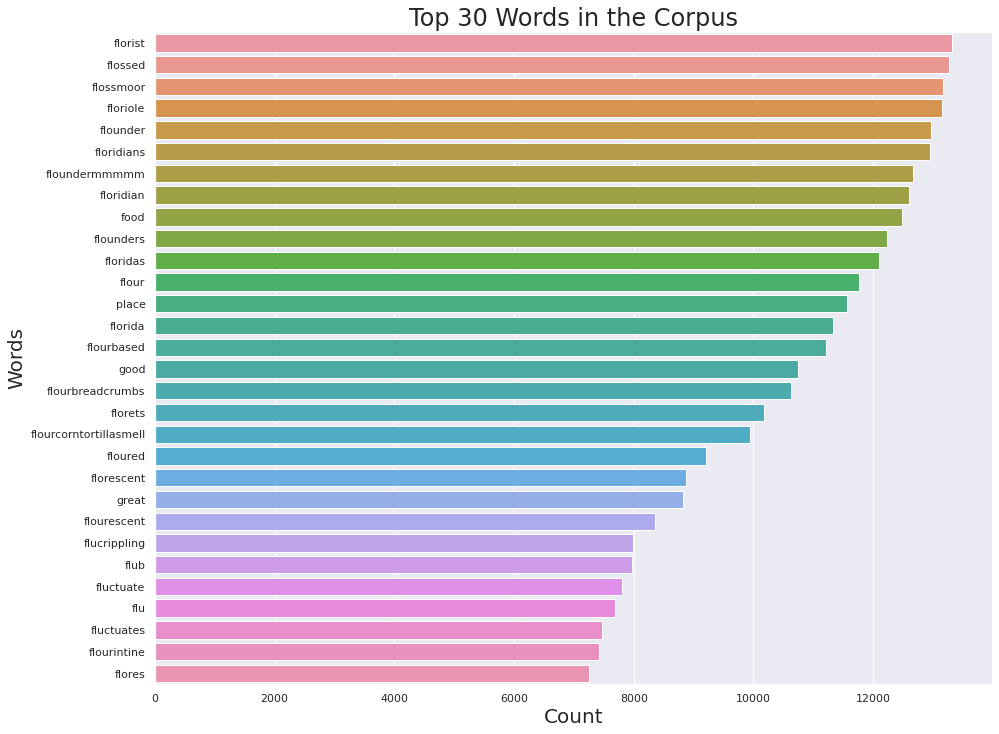

In [30]:
# plot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 12)
ax = sns.barplot(x='count', y='word', data=df_common_words[:30])
ax.set_title('Top 30 Words in the Corpus', size = 24)
ax.set_xlabel('Count', size = 20)
ax.set_ylabel("Words", size = 20)

fig.savefig('top_30_words.png')

## Creating A Word Cloud
### A word cloud is a novelty visual representation of text data, typically used to depict keyword metadata on websites, or to visualize free form text. In Word Clouds the importance of each tag is shown with font size or color.

In [31]:
from wordcloud import WordCloud

In [32]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Adding the Stop Words
stop_words = text.ENGLISH_STOP_WORDS

In [33]:
wc = WordCloud(width = 800, height = 400, stopwords = stop_words, background_color = 'white', colormap = 'Dark2', 
               max_font_size = 170, random_state = 45)

In [34]:
data_for_wc = pd.DataFrame()
data_for_wc['review'] = data_review_cleaned['review']
data_for_wc = data_for_wc.reset_index(drop = True)

In [35]:
#data_for_wc

In [36]:
#Extracting text of all reviews into one string for WordCloud
text_wc = ' '
for i in range(len(data_for_wc)):
    text_wc += data_for_wc['review'][i]

(-0.5, 799.5, 399.5, -0.5)

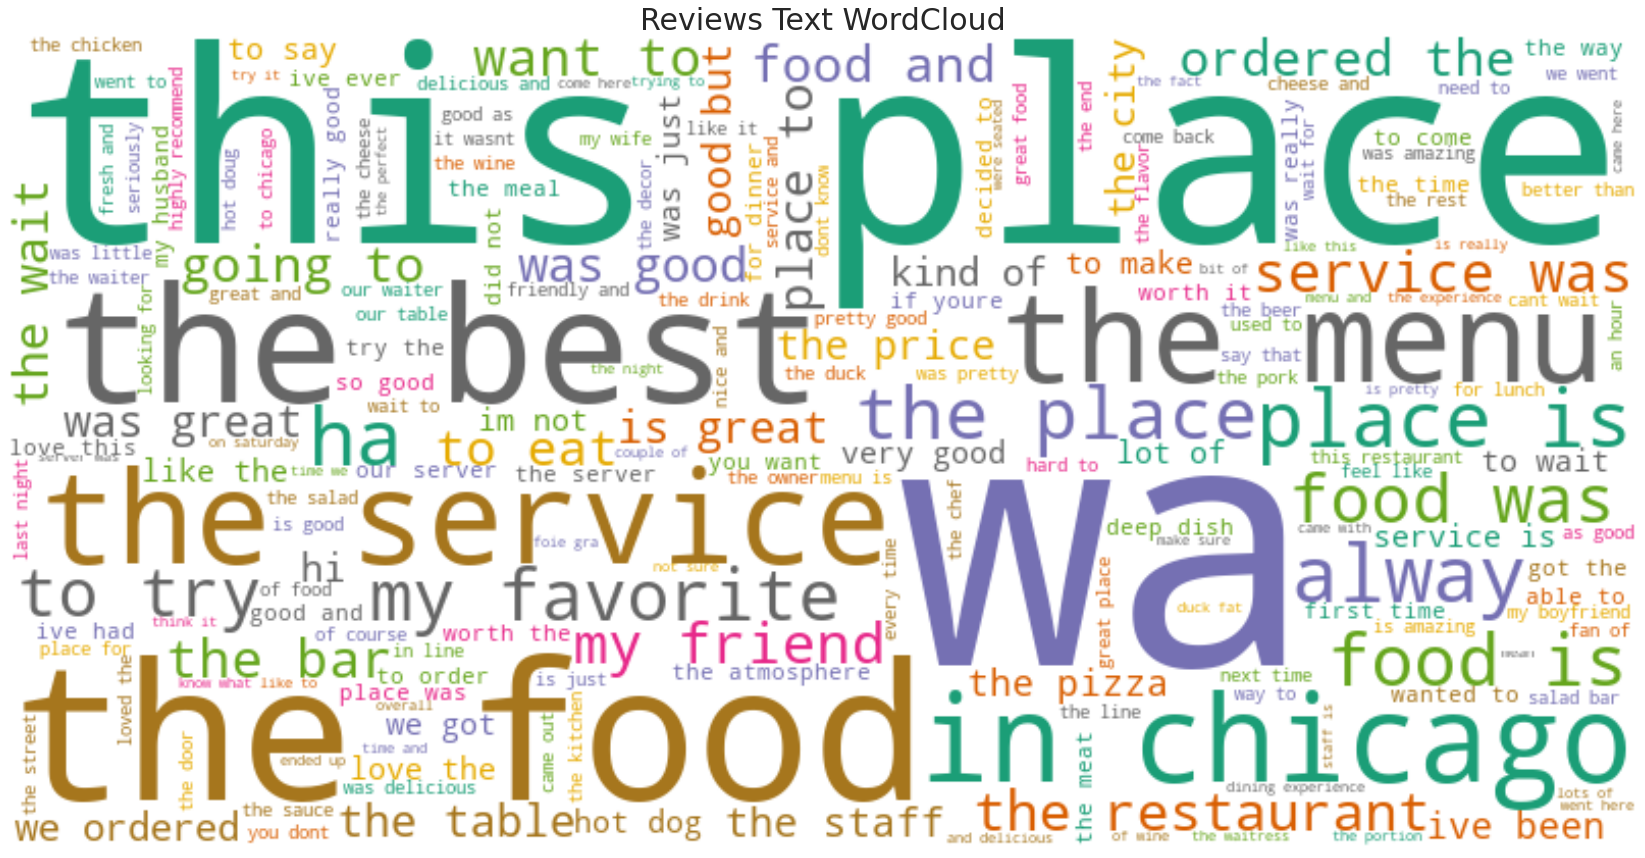

In [37]:
cloud = wc.generate(text_wc)
plt.figure(figsize=(30,15))
plt.title('Reviews Text WordCloud', fontsize = 30)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

In [38]:
cloud.to_file('word_cloud.png')

# Sentiment Analysis

### Updating Train DataFrame with cleaned "reviews" text

In [39]:
df_train['review'] = data_review_cleaned['review']
df_train

,review,vote_funny,vote_cool,vote_useful,rating
0,dear longman eagleyouve left me no choice the...,0,1,3,1
1,delish the hubby and i wanted to do brunch on ...,0,0,0,5
2,yep ive giving yolk stars its just really tha...,1,0,1,5
3,meat meat meat its meattastic so much meat in ...,17,3,3,3
4,i caught up with the law school girls on a sat...,0,0,0,3
...,...,...,...,...,...
28063,this afternoon i went to yolk with my college ...,0,0,0,1
28064,place has lots of side dishes but thats about ...,0,0,0,1
28065,i am a huge fan of brazillian steakhouses ive ...,0,0,5,5
28066,great brunch,0,0,0,5


### Extracting Sentiments

In [40]:
data = df_train

In [41]:
from textblob import TextBlob

1. ### Polarity is how Positive or Negative the expression is
    * #### polarity >= 0.5 signifies that the statement is positive
    * #### polarity < 0.5 signifies that the statement is negative  
2. ### Subjectivity is how Factual or Opinionated the expression is    
    * ### subjectivity >=0.5 signifies that the statement is 'opinioinated'
    * ### subjectivity <0.5 signifies that the statement is 'factual'

In [42]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['review'].apply(pol)
data['subjectivity'] = data['review'].apply(sub)

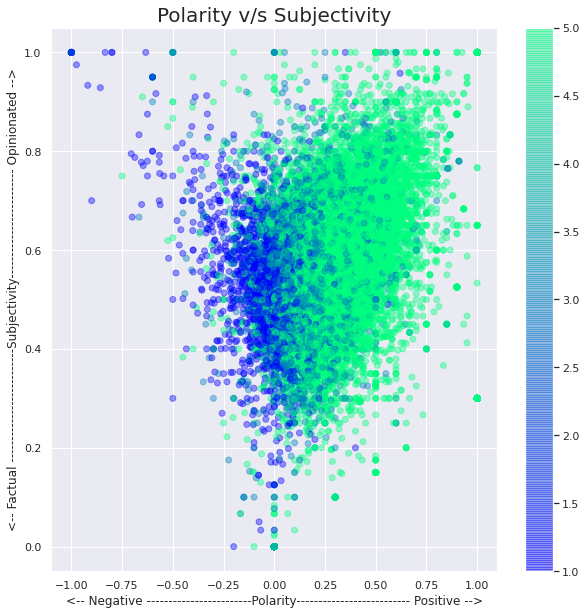

In [43]:
plt.figure(figsize = (10,10))
scatter = plt.scatter(data['polarity'], data['subjectivity'], c= data['rating'], cmap = 'winter', alpha = 0.4)
plt.xlabel('<-- Negative ------------------------Polarity-------------------------- Positive -->')
plt.ylabel('<-- Factual --------------------------Subjectivity------------------------- Opinionated -->')
plt.title('Polarity v/s Subjectivity', size  = 20)
plt.colorbar()
plt.show

plt.savefig('polarity_vs_subjectivity_sentiment', dpi = 150)

## Visualising Positive v/s Negative Reviews

In [44]:
positive_values = 0
negative_values = 0

for i in range(len(data['polarity'])):
    if data['polarity'][i]<0.5:
        negative_values +=1
    else:
        positive_values +=1

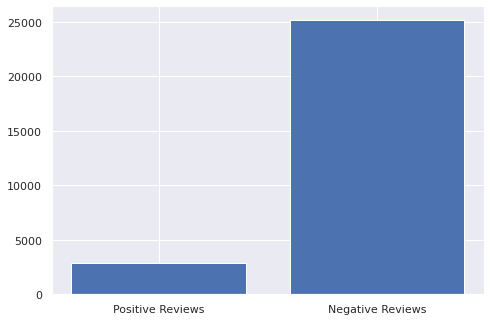

<Figure size 432x288 with 0 Axes>

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
polarity_prop = ['Positive Reviews', 'Negative Reviews']
polarity_vals = [positive_values, negative_values]
ax.bar(polarity_prop, polarity_vals)
plt.show()

plt.savefig('pos_vs_neg_reviews.png', dpi = 150)

### Sometimes there may be a chance where a review is based purely on opinion and may not be a fact. Hence,  we will take advantage of the Subjectivity sentiment to classify reviews on the basis of being 'Factual' and 'Opinionated'

## Visualising Facts v/s Opinions in the Reviews

In [46]:
factual_values = 0
opinionated_values = 0

for i in range(len(data['subjectivity'])):
    if data['subjectivity'][i]<0.5:
        factual_values +=1
    else:
        opinionated_values +=1

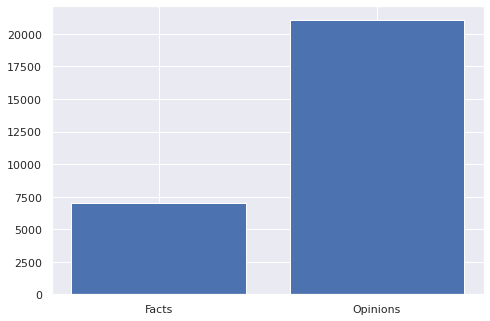

<Figure size 432x288 with 0 Axes>

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
subjectivity_prop = ['Facts', 'Opinions']
subjectivity_vals = [factual_values, opinionated_values]
ax.bar(subjectivity_prop, subjectivity_vals)
plt.show()

plt.savefig('facts_vs_opinions.png', dpi = 150)

## Plotting Correlation between Features

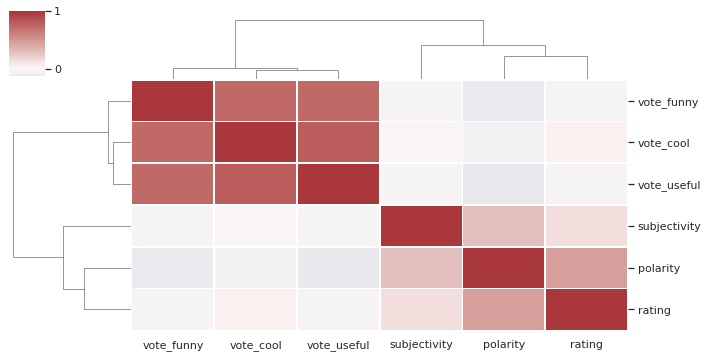

In [48]:
cor = df_train.loc[:,["vote_funny","vote_cool",'vote_useful',"polarity", "subjectivity","rating"]]
correlation_map = sns.clustermap(cor.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(10, 5))

correlation_map.savefig('feature_correlation.png', dpi = 150)

# Predictive Analysis

## Rearranging Columns for Predictive Analysis

In [49]:
df_train.columns.values

array(['review', 'vote_funny', 'vote_cool', 'vote_useful', 'rating',
       'polarity', 'subjectivity'], dtype=object)

In [50]:
cols = ['review', 'vote_funny', 'vote_cool', 'vote_useful','polarity', 'subjectivity','rating']
df_train = df_train[cols]
df_train

,review,vote_funny,vote_cool,vote_useful,polarity,subjectivity,rating
0,dear longman eagleyouve left me no choice the...,0,1,3,0.099561,0.533772,1
1,delish the hubby and i wanted to do brunch on ...,0,0,0,0.286531,0.464456,5
2,yep ive giving yolk stars its just really tha...,1,0,1,0.338017,0.537500,5
3,meat meat meat its meattastic so much meat in ...,17,3,3,0.195748,0.490136,3
4,i caught up with the law school girls on a sat...,0,0,0,0.082262,0.464286,3
...,...,...,...,...,...,...,...
28063,this afternoon i went to yolk with my college ...,0,0,0,-0.040761,0.595290,1
28064,place has lots of side dishes but thats about ...,0,0,0,-0.146032,0.528571,1
28065,i am a huge fan of brazillian steakhouses ive ...,0,0,5,0.124731,0.552151,5
28066,great brunch,0,0,0,0.800000,0.750000,5


In [51]:
df_train['rating'].unique()

array([1, 5, 3])

# Logistic Regression

In [52]:
targets = df_train['rating']
inputs = df_train.drop(['review','rating'], axis = 1)

## Visualising Inputs v/s Targets

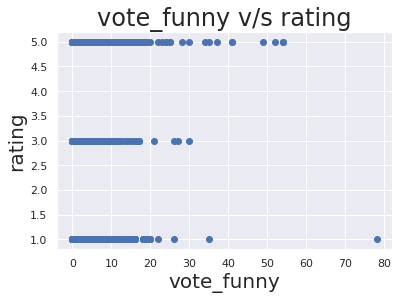

In [53]:
plt.scatter(inputs['vote_funny'], targets)
plt.xlabel('vote_funny', size = 20)
plt.ylabel('rating', size = 20)
plt.title('vote_funny v/s rating', size = 24)
plt.show()

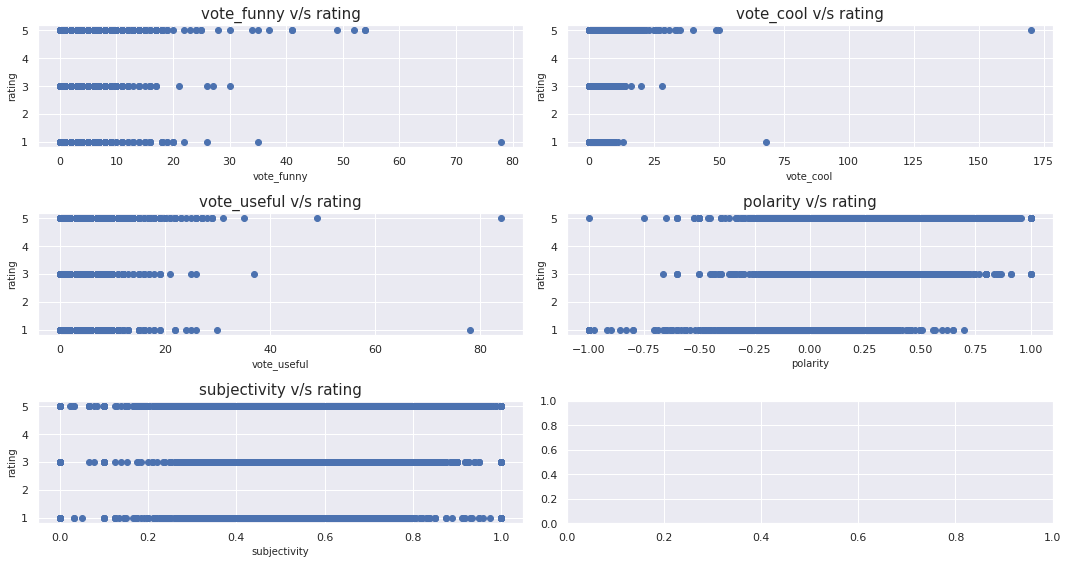

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

axes[0,0].scatter(inputs['vote_funny'], targets)
axes[0,0].set_title('vote_funny v/s rating', size = 15)
axes[0,0].set_xlabel('vote_funny', size = 10)
axes[0,0].set_ylabel('rating', size = 10)

axes[0,1].scatter(inputs['vote_cool'], targets)
axes[0,1].set_title('vote_cool v/s rating', size = 15)
axes[0,1].set_xlabel('vote_cool', size = 10)
axes[0,1].set_ylabel('rating', size = 10)

axes[1,0].scatter(inputs['vote_useful'], targets)
axes[1,0].set_title('vote_useful v/s rating', size = 15)
axes[1,0].set_xlabel('vote_useful', size = 10)
axes[1,0].set_ylabel('rating', size = 10)

axes[1,1].scatter(inputs['polarity'], targets)
axes[1,1].set_title('polarity v/s rating', size = 15)
axes[1,1].set_xlabel('polarity', size = 10)
axes[1,1].set_ylabel('rating', size = 10)

axes[2,0].scatter(inputs['subjectivity'], targets)
axes[2,0].set_title('subjectivity v/s rating', size = 15)
axes[2,0].set_xlabel('subjectivity', size = 10)
axes[2,0].set_ylabel('rating', size = 10)

fig.tight_layout()

plt.savefig('logistic_regression_data_distribution_scatter_plots.png', dpi = 150)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs, targets, test_size = 0.1, random_state = 365)

## The Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [57]:
log_reg = LogisticRegression()
log_results  = log_reg.fit(x_train, y_train)

In [58]:
y_pred = log_reg.predict(x_test)

### Confusion Matrix for the Logistic Regression Model

In [59]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  89,   48,  101],
       [  27,   53,  532],
       [  32,   38, 1887]])

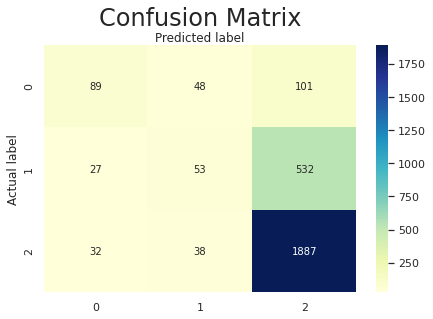

In [60]:
class_names = [1,3,5]
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

fig.savefig('logistic_regression_confusion_matrix.png', dpi = 150)

In [61]:
print("Accuracy: "+str((metrics.accuracy_score(y_test, y_pred)*100).round(3))+"%")

Accuracy: 72.284%


## Making Predictions using the Logistic Regression Model on the Test Data

In [62]:
y_pred_logistic_regression = log_reg.predict(df_test.drop(['review'], axis = 1))

### Saving Predictions to a .csv file

In [63]:
pd.DataFrame(y_pred_logistic_regression).to_csv("logistic_regression_predictions.csv")

# K- Nearest Neighbour Classifier

In [64]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=125)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [65]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Calculating the Model Accuracy
print("Accuracy:" + str((metrics.accuracy_score(y_test, y_pred)*100).round(3))+"%")

Accuracy:73.424%


## Making predicting usince the KNN Model on the Test Data

In [66]:
y_pred_KNN_predictions = knn.predict(df_test.drop(['review'], axis = 1))

### Saving the KNN Model Predictions to a .csv file

In [67]:
pd.DataFrame(y_pred_KNN_predictions).to_csv("KNN_predictions.csv")

# Naive Bayes Classification

## Gaussian Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train);

In [69]:
pred = model.predict(x_test)

In [70]:
acc = model.score(x_test,y_test)
print("Accuracy(Gaussian Naive Bayes) = " + str((acc*100).round(3))+"%")

Accuracy(Gaussian Naive Bayes) = 62.95%


## Bernoulli Naive Bayes

In [71]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

BernNB = BernoulliNB(binarize = False)
BernNB.fit(x_train, y_train)

y_expected = y_test
y_pred = BernNB.predict(x_test)

print("Accuracy (Bernoulli Naive Bayes): "+ str(((accuracy_score(y_expected, y_pred))*100).round(3)) + "%")

Accuracy (Bernoulli Naive Bayes): 71.25%


## Multinomial Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB

model_mn = MultinomialNB()
model_mn.fit(x_train.drop(['polarity'], axis = 1), y_train)


accuracy_multinomial_nb = model_mn.score(x_test.drop(['polarity'], axis = 1), y_test)
print("Accuracy (Multinomial Naive Bayes): "+ str((accuracy_multinomial_nb*100).round(3)) + "%")

Accuracy (Multinomial Naive Bayes): 70.039%


### From the above Naive Bayes Computations it is clear that Bernoulli Naive Bayes predicts the targets most efficienntly. Hence, we will save the predictions to the Bernoulli Naive Bayes Model

### Saving the predictions of the Multinomial Naive Bayes Model to a .csv file

In [73]:
y_pred = model_mn.predict(df_test.drop(['review','polarity'], axis = 1))

In [74]:
pd.DataFrame(y_pred).to_csv("Multinomial_Naive_Bayes_Predictions.csv")

# Random Forest Calssifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model = RandomForestClassifier(n_estimators = 1500, criterion = 'gini', random_state = 0)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
y_pred = model.predict(x_test)

### Validating Performance of the Random Forest Model

In [78]:
from sklearn.metrics import confusion_matrix

### Confusion Matrix for the Random Forest Model

In [79]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 100,   67,   71],
       [  58,  153,  401],
       [  45,  199, 1713]])

Text(0.5, 257.44, 'Predicted label')

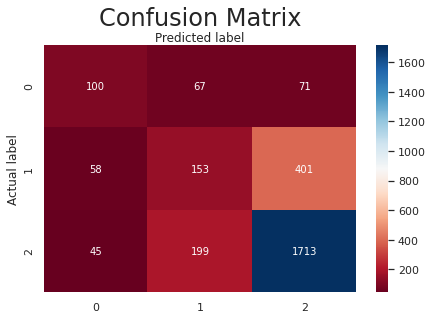

In [80]:
class_names = [1,3,5]
fig, ax = plt.subplots()
tick_marks = np.arange(1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [81]:
print("Accuracy = "+ str(((model.score(x_test,y_test))*100).round(3))+"%")

Accuracy = 70.039%


In [82]:
y_pred = model.predict(df_test.drop(['review'], axis = 1))

### Saving the Predictions of the Random Forest Classifier to a .csv file

In [83]:
pd.DataFrame(y_pred).to_csv("Random_Forest_Classifier_predictions.csv")

# Support Vector Machine Classifier

In [84]:
from sklearn import svm

In [85]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [86]:
print("Accuracy:",str(((metrics.accuracy_score(y_test, y_pred))*100).round(3)) + "%")

Accuracy: 72.177%


In [87]:
y_pred_svm = clf.predict(df_test.drop(['review'], axis = 1))
pd.DataFrame(y_pred).to_csv("SVM_predictions.csv")

# Deep Neural Network (DNN)

In [88]:
#import numpy as np
import tensorflow as tf
from sklearn import preprocessing

In [89]:
unscaled_inputs_all = df_train[['vote_funny', 'vote_cool', 'vote_useful','polarity', 'subjectivity']]
targets_all = df_train['rating']

## Scaling the Inputs

In [90]:
scaled_inputs = preprocessing.scale(unscaled_inputs_all)

## Shuffling the Data

In [91]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

In [92]:
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_all[shuffled_indices]

### Splitting the data into a Training and Validation Set

In [93]:
samples_count = shuffled_inputs.shape[0]
samples_count

28068

In [94]:
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.2 * samples_count)

In [95]:
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count + validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count + validation_samples_count]

In [96]:
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count + validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count + validation_samples_count]

### Saving the Dataframe in a .npz format

In [97]:
np.savez('rating_train_data', inputs = train_inputs, targets = train_targets)
np.savez('rating_validation_data', inputs = validation_inputs, targets = validation_targets)

## Outlining the DNN Model

In [98]:
npz = np.load('/kaggle/working/rating_train_data.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('/kaggle/working/rating_validation_data.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

## The Model

In [99]:
input_size = 5
output_size = 3

hidden_layer_size = 100

In [100]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),

    tf.keras.layers.Dense(hidden_layer_size, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

batch_size = 55
max_epochs = 100

### Early Stopping

In [101]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

## Fitting the Model

In [102]:
history = model.fit(train_inputs, train_targets,
         batch_size = batch_size,
         epochs= max_epochs,
         callbacks = [early_stopping],
         validation_data = (validation_inputs, validation_targets),
         verbose = 1)

Train on 22454 samples, validate on 5613 samples
Epoch 1/100
22454/22454 [==============================] - 2s 76us/sample - loss: 0.9021 - accuracy: 0.6997 - val_loss: 0.6395 - val_accuracy: 0.7233
Epoch 2/100
22454/22454 [==============================] - 1s 47us/sample - loss: 0.6459 - accuracy: 0.7214 - val_loss: 0.6285 - val_accuracy: 0.7303
Epoch 3/100
22454/22454 [==============================] - 1s 47us/sample - loss: 0.6438 - accuracy: 0.7223 - val_loss: 0.6307 - val_accuracy: 0.7240
Epoch 4/100
22454/22454 [==============================] - 1s 46us/sample - loss: 0.6409 - accuracy: 0.7231 - val_loss: 0.6244 - val_accuracy: 0.7242
Epoch 5/100
22454/22454 [==============================] - 1s 47us/sample - loss: 0.6384 - accuracy: 0.7248 - val_loss: 0.6369 - val_accuracy: 0.7214
Epoch 6/100
22454/22454 [==============================] - 1s 47us/sample - loss: 0.6371 - accuracy: 0.7246 - val_loss: 0.6294 - val_accuracy: 0.7297


In [103]:
model.save_weights("restaurant_rating_model.h5")

## Visualising Training

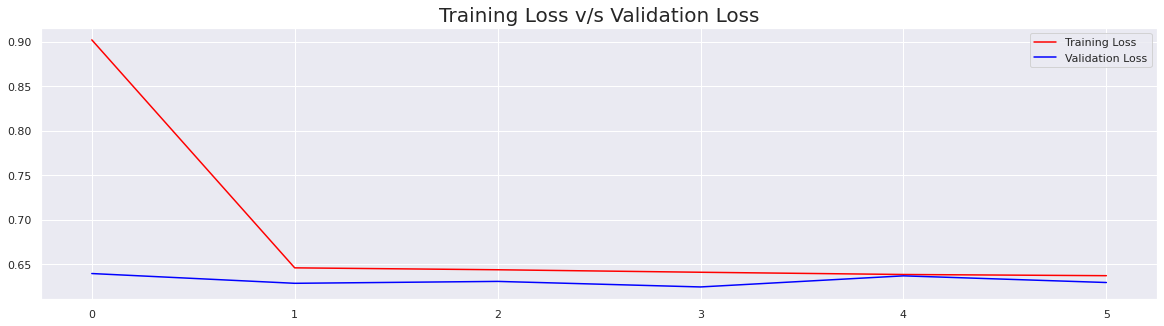

In [104]:
plt.figure(figsize = (20,5))
plt.plot(history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.title('Training Loss v/s Validation Loss', size = 20)
plt.legend()
plt.show()

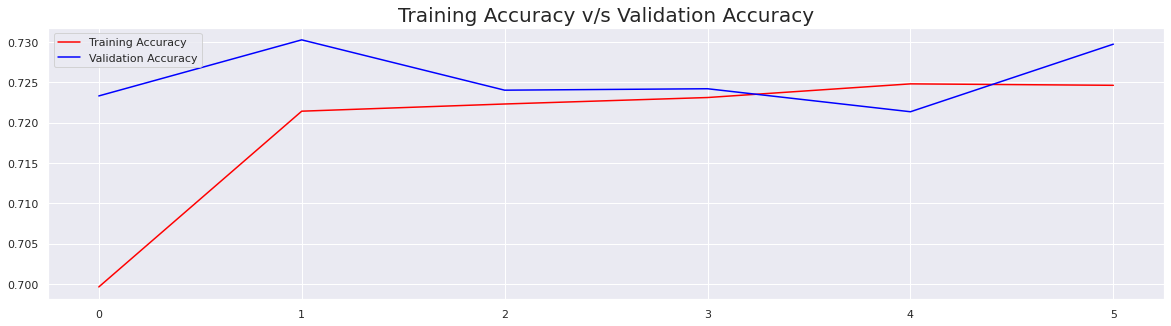

In [105]:
plt.figure(figsize = (20,5))
plt.plot(history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.title('Training Accuracy v/s Validation Accuracy', size = 20)
plt.legend()
plt.show()

## Extracting DNN Predictions on Test Data

In [106]:
df_test_dnn = df_test.drop(['review'], axis = 1)
test_inputs_unscaled = df_test_dnn
np.savez('rating_test_data', inputs = test_inputs_unscaled)

In [107]:
npz = np.load('/kaggle/working/rating_test_data.npz')
test_inputs = npz['inputs'].astype(np.float)

In [108]:
predictions = model.predict(df_test_dnn)
pd.DataFrame(predictions).to_csv("DNN_predictions.csv")